In [2]:
from google.colab import userdata
api_key= userdata.get('cos_api_key')

In [3]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

### 731Y003

In [ ]:
import requests
stat_code = "731Y003"

url = f"https://ecos.bok.or.kr/api/StatisticItemList/{api_key}/json/kr/1/1000/{stat_code}"
res = requests.get(url).json()

for row in res['StatisticItemList']['row']:
    print(row['ITEM_CODE'], row['ITEM_NAME'])

0000002 원/달러(시가)
0000005 원/달러(고가)
0000004 원/달러(저가)
0000003 원/달러(종가 15:30)
0000013 원/달러(종가 02:00)
0000007 원/위안(시가)
0000008 원/위안(고가)
0000009 원/위안(저가)
0000010 원/위안(종가)
0000006 원/100엔(하나은행고시)


### 731Y006

In [8]:
# 항목 코드 먼저 확인
url = f"https://ecos.bok.or.kr/api/StatisticItemList/{api_key}/json/kr/1/1000/731Y006"
res = requests.get(url).json()

for row in res['StatisticItemList']['row']:
    print(row['ITEM_CODE'], row['ITEM_NAME'])

0000002 원/달러(시가)
0000002 원/달러(시가)
0000002 원/달러(시가)
0000002 원/달러(시가)
0000005 원/달러(고가)
0000005 원/달러(고가)
0000005 원/달러(고가)
0000005 원/달러(고가)
0000004 원/달러(저가)
0000004 원/달러(저가)
0000004 원/달러(저가)
0000004 원/달러(저가)
0000003 원/달러(종가 15:30)
0000003 원/달러(종가 15:30)
0000003 원/달러(종가 15:30)
0000003 원/달러(종가 15:30)
0000013 원/달러(종가 02:00)
0000013 원/달러(종가 02:00)
0000013 원/달러(종가 02:00)
0000013 원/달러(종가 02:00)
0000007 원/위안(시가)
0000007 원/위안(시가)
0000007 원/위안(시가)
0000007 원/위안(시가)
0000008 원/위안(고가)
0000008 원/위안(고가)
0000008 원/위안(고가)
0000008 원/위안(고가)
0000009 원/위안(저가)
0000009 원/위안(저가)
0000009 원/위안(저가)
0000009 원/위안(저가)
0000010 원/위안(종가)
0000010 원/위안(종가)
0000010 원/위안(종가)
0000010 원/위안(종가)
0000006 원/100엔(하나은행고시)
0000006 원/100엔(하나은행고시)
0000006 원/100엔(하나은행고시)
0000006 원/100엔(하나은행고시)
0000100 평균자료
0000100 평균자료
0000100 평균자료
0000100 평균자료
0000200 말일자료
0000200 말일자료
0000200 말일자료
0000200 말일자료


In [16]:
import requests
import pandas as pd

stat_code = "731Y006"
item_code = "0000003"  # ✅ 원/달러 평균환율 (종가 15:30)
period = "M"
start = "202301"
end = "202503"

url = f"https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/1000/{stat_code}/{period}/{start}/{end}/{item_code}/?/?/?"
res = requests.get(url).json()

if 'StatisticSearch' in res and 'row' in res['StatisticSearch']:
    df = pd.DataFrame(res['StatisticSearch']['row'])
    df = df[['TIME', 'DATA_VALUE']]
    df.columns = ['날짜', '원/달러 평균환율']
    df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m')
    df.set_index('날짜', inplace=True)
    print(df)
else:
    print("⚠️ 데이터가 없습니다.")
    print(res)

           원/달러 평균환율
날짜                  
2023-01-01   1245.34
2023-01-01    1231.9
2023-02-01   1276.54
2023-02-01    1322.6
2023-03-01    1305.4
2023-03-01    1301.9
2023-04-01   1322.05
2023-04-01    1337.7
2023-05-01   1327.93
2023-05-01    1327.2
2023-06-01   1296.55
2023-06-01    1317.7
2023-07-01   1283.22
2023-07-01    1274.6
2023-08-01   1321.54
2023-08-01    1321.8
2023-09-01   1331.73
2023-09-01    1349.3
2023-10-01   1351.11
2023-10-01    1350.5
2023-11-01   1308.01
2023-11-01      1290
2023-12-01   1305.12
2023-12-01      1288
2024-01-01   1325.67
2024-01-01    1334.6
2024-02-01   1331.37
2024-02-01    1331.5
2024-03-01   1331.63
2024-03-01    1347.2
2024-04-01   1369.25
2024-04-01      1382
2024-05-01   1365.05
2024-05-01    1384.5
2024-06-01   1379.95
2024-06-01    1376.7
2024-07-01   1383.37
2024-07-01    1376.5
2024-08-01   1352.87
2024-08-01      1336
2024-09-01   1332.76
2024-09-01    1307.8
2024-10-01   1365.37
2024-10-01    1379.9
2024-11-01   1394.32
2024-11-01   

In [17]:
df = pd.DataFrame(res['StatisticSearch']['row'])
print(df.columns)

Index(['STAT_CODE', 'STAT_NAME', 'ITEM_CODE1', 'ITEM_NAME1', 'ITEM_CODE2',
       'ITEM_NAME2', 'ITEM_CODE3', 'ITEM_NAME3', 'ITEM_CODE4', 'ITEM_NAME4',
       'UNIT_NAME', 'WGT', 'TIME', 'DATA_VALUE'],
      dtype='object')


In [21]:
df = pd.DataFrame(res['StatisticSearch']['row'])
print(df[['TIME', 'DATA_VALUE', 'ITEM_NAME1', 'WGT', 'ITEM_NAME2']].head(10))

     TIME DATA_VALUE      ITEM_NAME1   WGT ITEM_NAME2
0  202301    1245.34  원/달러(종가 15:30)  None       평균자료
1  202301     1231.9  원/달러(종가 15:30)  None       말일자료
2  202302    1276.54  원/달러(종가 15:30)  None       평균자료
3  202302     1322.6  원/달러(종가 15:30)  None       말일자료
4  202303     1305.4  원/달러(종가 15:30)  None       평균자료
5  202303     1301.9  원/달러(종가 15:30)  None       말일자료
6  202304    1322.05  원/달러(종가 15:30)  None       평균자료
7  202304     1337.7  원/달러(종가 15:30)  None       말일자료
8  202305    1327.93  원/달러(종가 15:30)  None       평균자료
9  202305     1327.2  원/달러(종가 15:30)  None       말일자료


➞ 값이 두개였던 이유 : 월별 평균자료(시계열트렌드)와 말일자료(특정시점) 존재

- 평균자료만 보기

In [22]:
df = pd.DataFrame(res['StatisticSearch']['row'])

# 평균자료만 필터링
df_avg = df[df['ITEM_NAME2'] == '평균자료']

# 필요한 컬럼 정리
df_avg = df_avg[['TIME', 'DATA_VALUE']]
df_avg.columns = ['날짜', '원/달러 평균환율']
df_avg['날짜'] = pd.to_datetime(df_avg['날짜'], format='%Y%m')
df_avg.set_index('날짜', inplace=True)

print(df_avg)

           원/달러 평균환율
날짜                  
2023-01-01   1245.34
2023-02-01   1276.54
2023-03-01    1305.4
2023-04-01   1322.05
2023-05-01   1327.93
2023-06-01   1296.55
2023-07-01   1283.22
2023-08-01   1321.54
2023-09-01   1331.73
2023-10-01   1351.11
2023-11-01   1308.01
2023-12-01   1305.12
2024-01-01   1325.67
2024-02-01   1331.37
2024-03-01   1331.63
2024-04-01   1369.25
2024-05-01   1365.05
2024-06-01   1379.95
2024-07-01   1383.37
2024-08-01   1352.87
2024-09-01   1332.76
2024-10-01   1365.37
2024-11-01   1394.32
2024-12-01   1436.78
2025-01-01    1455.5
2025-02-01   1445.58
2025-03-01   1457.92


### 월별 원/달러 평균 환율 추이(202301-202503)

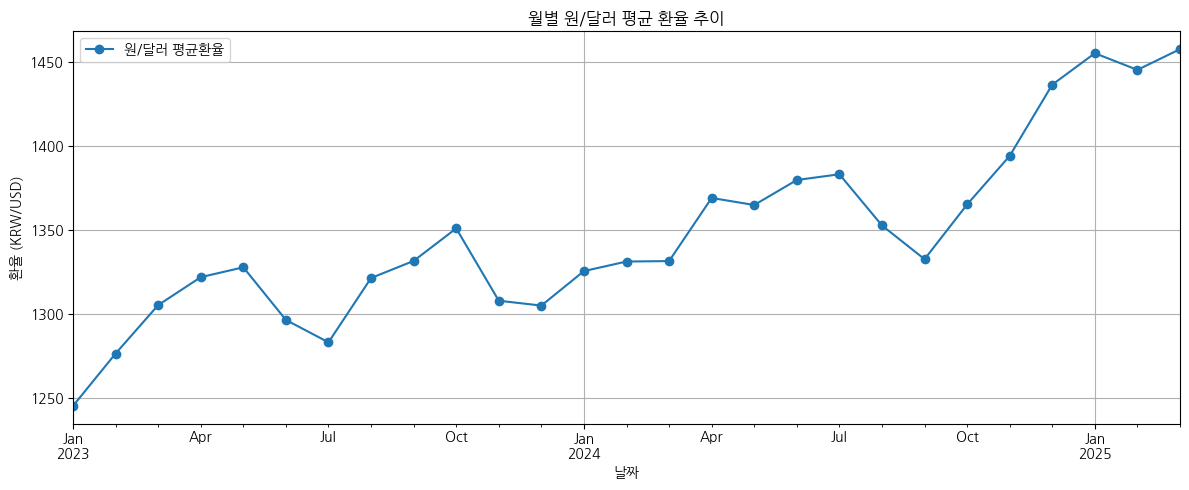

In [26]:
import matplotlib.pyplot as plt

df_avg['원/달러 평균환율'] = pd.to_numeric(df_avg['원/달러 평균환율'])

df_avg.plot(figsize=(12, 5), marker='o', title='월별 원/달러 평균 환율 추이')
plt.ylabel("환율 (KRW/USD)")
plt.xlabel("날짜")
plt.grid(True)
plt.tight_layout()
plt.show()

### 월별 원/달러 변동률

  - 그래프가 0% 위로 튀면 → 환율 상승 (원화 약세)
  - 그래프가 0% 아래로 꺼지면 → 환율 하락 (원화 강세)

In [28]:
df_avg['변동률(%)'] = df_avg['원/달러 평균환율'].pct_change() * 100

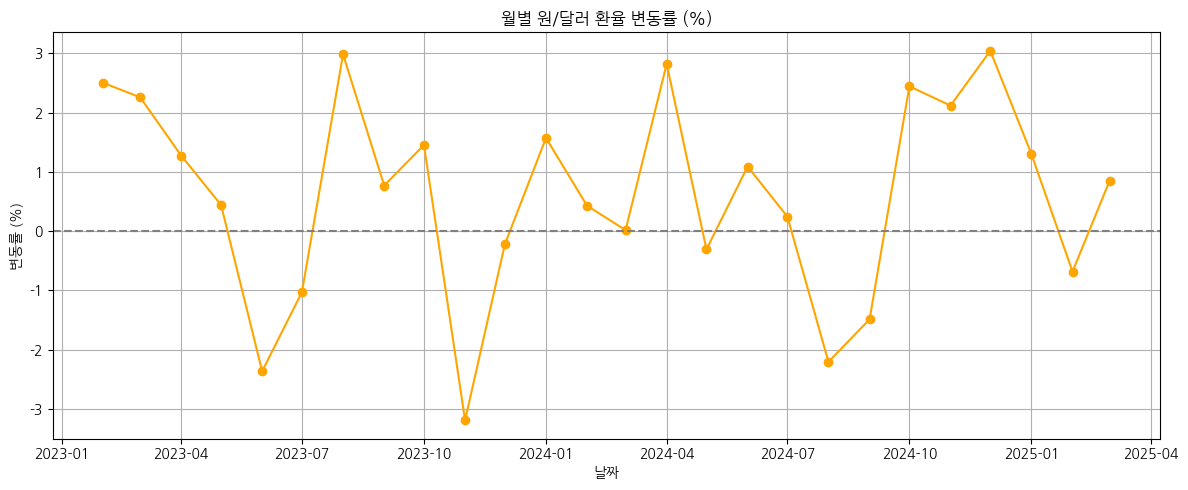

In [29]:
plt.figure(figsize=(12, 5))
plt.plot(df_avg.index, df_avg['변동률(%)'], marker='o', color='orange')
plt.axhline(0, color='gray', linestyle='--')  # 기준선
plt.title("월별 원/달러 환율 변동률 (%)")
plt.ylabel("변동률 (%)")
plt.xlabel("날짜")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
max_up = df_avg['변동률(%)'].idxmax()
max_down = df_avg['변동률(%)'].idxmin()

print(f"환율 가장 많이 오른 달: {max_up.strftime('%Y-%m')} ({df_avg.loc[max_up, '변동률(%)']:.2f}%)")
print(f"환율 가장 많이 떨어진 달: {max_down.strftime('%Y-%m')} ({df_avg.loc[max_down, '변동률(%)']:.2f}%)")

환율 가장 많이 오른 달: 2024-12 (3.05%)
환율 가장 많이 떨어진 달: 2023-11 (-3.19%)


- 이번엔 다른 지표(금리, 무역수지 등)과 병합 분석


✓ 외국인 투자 지표는 한국거래소(KRX) 또는 금융감독원 API

### 병합전 통계코드와 항목코드 확인

In [32]:
def get_item_list(stat_code):
    url = f"https://ecos.bok.or.kr/api/StatisticItemList/{api_key}/json/kr/1/1000/{stat_code}"
    res = requests.get(url).json()

    if 'StatisticItemList' in res and 'row' in res['StatisticItemList']:
        df = pd.DataFrame(res['StatisticItemList']['row'])
        return df[['ITEM_CODE', 'ITEM_NAME']]
    else:
        print(f"⚠️ 항목 리스트 불러오기 실패: {stat_code}")
        return pd.DataFrame()

In [33]:
# 수출 항목 확인
get_item_list("901Y011")  # 국가별 수출

# 수입 항목 확인
get_item_list("901Y012")  # 국가별 수입

# 수출금액지수
get_item_list("403Y001")

# 수입금액지수
get_item_list("403Y003")

# 교역조건지수
get_item_list("403Y005")


,ITEM_CODE,ITEM_NAME
0,A,순상품교역조건지수
1,A,순상품교역조건지수
2,A,순상품교역조건지수
3,B,소득교역조건지수
4,B,소득교역조건지수
5,B,소득교역조건지수


► ITEM_NAME 설명:

- 순상품교역조건지수 (ITEM_CODE: A)

  수출단가 ÷ 수입단가 × 100

  100보다 크면 수출품 단가가 수입품보다 비싸다 = 유리한 조건

  교역에서 물건 한 단위로 얼마나 가치를 주고받는가를 측정

- 소득교역조건지수 (ITEM_CODE: B)

  순상품교역조건지수 × 수출물량지수 ÷ 100

  실제로 수출을 통해 얻는 총 수입 능력까지 고려한 지표

  물량 + 단가 모두 반영한 소득 창출력 평가

In [39]:
def get_item_list(stat_code):
    url = f"https://ecos.bok.or.kr/api/StatisticItemList/{api_key}/json/kr/1/1000/{stat_code}"
    res = requests.get(url).json()

    if 'StatisticItemList' in res and 'row' in res['StatisticItemList']:
        df = pd.DataFrame(res['StatisticItemList']['row'])
        return df[['ITEM_CODE', 'ITEM_NAME']]
    else:
        print(f"⚠️ 항목 리스트 불러오기 실패: {stat_code}")
        return pd.DataFrame()

# 수출 항목 코드 확인
get_item_list("901Y011")  # 국가별 수출

# 수입 항목 코드 확인
get_item_list("901Y012")  # 국가별 수입

,ITEM_CODE,ITEM_NAME
0,FIEF,국별수입(관세청)
1,FIEF,국별수입(관세청)
2,FIEF,국별수입(관세청)
3,FIEF24,수입총액(네덜란드)
4,FIEF24,수입총액(네덜란드)
...,...,...
70,FIEF41,수입총액(호주)
71,FIEF41,수입총액(호주)
72,FIEF03,수입총액(홍콩)
73,FIEF03,수입총액(홍콩)


- FIEF가 전체 수입인지 확인

In [43]:
# FIEF: 전체 수입
df_total_import = get_ecos_data("901Y012", "FIEF", "총수입(관세청)")

# 특정 국가 (미국 FIEF01, 중국 FIEF04)
df_us_import = get_ecos_data("901Y012", "FIEF31", "미국 수입")
df_china_import = get_ecos_data("901Y012", "FIEF02", "중국 수입")

# 직접 비교
df_compare = pd.concat([df_total_import, df_us_import, df_china_import], axis=1)
print(df_compare.head())

            총수입(관세청)    미국 수입     중국 수입
날짜                                     
2023-01-01  59037259  6995423  13140061
2023-02-01  55370498  6011957  11025734
2023-03-01  59635920  6675931  13189605
2023-04-01  51940137  5510740  11794076
2023-05-01  54251194  6017116  12379598


In [37]:
# 수출 항목 코드 확인
get_item_list("901Y011")  # 국가별 수출

,ITEM_CODE,ITEM_NAME
0,FIEE,국별수출(관세청)
1,FIEE,국별수출(관세청)
2,FIEE,국별수출(관세청)
3,FIEE24,수출총액(네덜란드)
4,FIEE24,수출총액(네덜란드)
...,...,...
70,FIEE41,수출총액(호주)
71,FIEE41,수출총액(호주)
72,FIEE03,수출총액(홍콩)
73,FIEE03,수출총액(홍콩)


In [44]:
# FIEE: 전체 수출
df_total_export = get_ecos_data("901Y011", "FIEE", "총수입(관세청)")

# 특정 국가 (미국 FIEF01, 중국 FIEF04)
df_us_export = get_ecos_data("901Y011", "FIEE31", "미국 수입")
df_china_export = get_ecos_data("901Y011", "FIEE02", "중국 수입")

# 직접 비교
df_compare = pd.concat([df_total_export, df_us_export, df_china_export], axis=1)
print(df_compare.head())

            총수입(관세청)    미국 수입     중국 수입
날짜                                     
2023-01-01  46339145  8058604   9207639
2023-02-01  49994593  8991831   9885693
2023-03-01  54882484  9775068  10478065
2023-04-01  49430879  9181047   9522777
2023-05-01  52054195  9459648  10579849


- 외국인 투자

In [45]:
get_item_list("901Y061")

,ITEM_CODE,ITEM_NAME
0,FF2A,신고건수
1,FF2A,신고건수
2,FF2AA,국제협력기구
3,FF2AA,국제협력기구
4,FF2AB,미주지역
5,FF2AB,미주지역
6,FF2AC,아주지역
7,FF2AC,아주지역
8,FF2AD,구주지역
9,FF2AD,구주지역


- 왜 두개 일까 FF2B의 하위분류에 어떤게 있는지 확인

In [57]:
df_ff2b.columns

Index(['STAT_CODE', 'STAT_NAME', 'GRP_CODE', 'GRP_NAME', 'ITEM_CODE',
       'ITEM_NAME', 'P_ITEM_CODE', 'P_ITEM_NAME', 'CYCLE', 'START_TIME',
       'END_TIME', 'DATA_CNT', 'UNIT_NAME', 'WEIGHT'],
      dtype='object')

In [58]:
import requests
import pandas as pd

# 외국인 투자 통계표 코드
stat_code = "901Y061"

# StatisticItemList API 호출
url = f"https://ecos.bok.or.kr/api/StatisticItemList/{api_key}/json/kr/1/1000/{stat_code}"
res = requests.get(url).json()

# DataFrame으로 변환하고 FF2B만 필터링
if 'StatisticItemList' in res and 'row' in res['StatisticItemList']:
    df_items = pd.DataFrame(res['StatisticItemList']['row'])
    df_ff2b = df_items[df_items['ITEM_CODE'] == 'FF2B']  # FF2B 관련 항목만
    display(df_ff2b)
else:
    print("⚠️ 항목 목록을 불러오지 못했습니다.")
    print(res)

,STAT_CODE,STAT_NAME,GRP_CODE,GRP_NAME,ITEM_CODE,ITEM_NAME,P_ITEM_CODE,P_ITEM_NAME,CYCLE,START_TIME,END_TIME,DATA_CNT,UNIT_NAME,WEIGHT
16,901Y061,3.4.2. 외국인투자(신고기준),Group1,계정항목,FF2B,신고금액,None,None,A,1962,2024,63,천달러,None
17,901Y061,3.4.2. 외국인투자(신고기준),Group1,계정항목,FF2B,신고금액,None,None,Q,1962Q2,2024Q4,246,천달러,None


> CYCLE	변수 A, Q	연간(A), 분기(Q) 둘 다 제공됨

In [59]:
import requests
import pandas as pd

# API 설정
stat_code = "901Y061"
item_code = "FF2B"
period = "Q"  # 분기
start = "2023Q1"
end = "2025Q4"

url = f"https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/1000/{stat_code}/{period}/{start}/{end}/{item_code}/?/?/?"
res = requests.get(url).json()

# 응답 확인 및 데이터 변환
if 'StatisticSearch' in res and 'row' in res['StatisticSearch']:
    df = pd.DataFrame(res['StatisticSearch']['row'])
    df = df[['TIME', 'DATA_VALUE']]
    df.columns = ['날짜', '외국인 투자금액']

    # 🔽 날짜 처리: '2023Q1' → '2023-03-01' 등으로 변환
    df['날짜'] = df['날짜'].str.replace('Q1', '-03-01') \
                           .str.replace('Q2', '-06-01') \
                           .str.replace('Q3', '-09-01') \
                           .str.replace('Q4', '-12-01')

    # datetime으로 변환
    df['날짜'] = pd.to_datetime(df['날짜'])

    # 인덱스 지정
    df.set_index('날짜', inplace=True)
    df['외국인 투자금액'] = pd.to_numeric(df['외국인 투자금액'], errors='coerce')

    print(df)
else:
    print("⚠️ 외국인 투자 데이터 없음")
    print(res)

            외국인 투자금액
날짜                  
2023-03-01   5633401
2023-06-01  11458947
2023-09-01   6849874
2023-12-01   8771794
2024-03-01   7054414
2024-06-01   8281261
2024-09-01   9847080
2024-12-01   9385627


- 참고 목록 (국내 요인)

| 항목                     | 통계표 코드 | 항목 코드     | 주기 | 설명 |
|--------------------------|--------------|----------------|------|------|
| 🇰🇷 원/달러 평균환율        | 731Y006      | 0000003         | M    | 종가(15:30) 기준, 월별 평균 환율 |
| 🌍 한국 기준금리 (국제비교) | 902Y006      | KR              | M    | 국제비교용 한국 기준금리 |
| 🇺🇸 미국 기준금리           | 902Y006      | US              | M    | 미국 연방 기준금리 |
| 📤 총 수출금액              | 901Y011      | FIEE            | M    | 전체 국가 대상 수출 (관세청 기준) |
| 📥 총 수입금액              | 901Y012      | FIEF            | M    | 전체 국가 대상 수입 (관세청 기준) |
| 📈 소득교역조건지수 (B)     | 403Y005      | B               | M    | 수출물량까지 고려한 실질 수입력 지수 |
| 🌍 외국인 투자금액          | 901Y061      | FF2B            | Q    | 전체 외국인 투자 신고금액 (단위: 천달러) |
| 🇨🇳 대중국 수출금액         | 901Y011      | FIEE02          | M    | 중국 대상 수출 총액 (관세청 기준) |
| 💵 외환보유액 (외환)         | 732Y001      | 04              | M    | 외화로 보유한 준비자산 (단위: 천달러) |
| 🛢️ 두바이유 가격            | 902Y003      | 010102          | M    | 국제유가: 중동 기준 원유 (달러/배럴) |
| 💰 무역수지                | 없음(직접계산)   | -    | M    | 수출 – 수입 |

소득교역조건지수(B) 선택 이유

단순 수출입 금액이 아닌
"수출을 통해 실질적으로 어느 정도의 수입을 살 수 있는가"
를 보여주는 소득 수준까지 고려한 실질 교역 지표<br>
➞ 환율의 구조적 흐름을 분석


|구분|순상품교역조건지수 (A)	|소득교역조건지수 (B)|
|-----|------------------------|------------------|
|계산	|수출단가 ÷ 수입단가	|(수출단가 ÷ 수입단가) × 수출물량지수|
|의미|	단가만 비교|	단가 + 수출 물량 → 실질 수입 능력|
|특징	|수출 물량이 많든 적든 반영 ❌	|수출이 많을수록 지수 증가 ⬆|
|환율과의 관계|	단가 중심 → 제한적 영향|	전체 수출의 힘 반영 → 환율에 영향 가능|

###  국제 흐름 분석할 수 있는 지표 알아보기

1. 외환 보유액

|항목|	통계표 코드|	항목 코드 (계정항목코드1)	|단위| 설명|
|----|---------|----------------------|----|----|
|외환보유액 (합계)|	732Y001|	99	|천달러|
|외환보유액 (금)	|732Y001|	01	|천달러|      국제결제용으로 보유 중인 금. 시장에 쉽게 투입되진 않음
|외환보유액 (특별인출권)|	732Y001	|02|	천달러|IMF가 발행하는 가상의 통화 바스켓. 달러 직접은 아님(비상용)
|외환보유액 (IMF포지션)|	732Y001|	03|	천달러|IMF 출자분 중 인출 가능한 금액
|외환보유액 (외환)	|732Y001	|04|	천달러|달러·유로·엔화 등 실질적인 외화 자산. 통화시장 개입 시 직접 사용

** 외환보유액은 단순히 외화를 쌓아둔 것이 아니라 국가가 보유하고 있는 결제수단 전체

일단 환율에 영향을 주는 유동 외화 규모를 확인

외환이 줄어들면 투자자들은 한국이 외환 위기 우려가 있다고 생각 → 투자 회피 & 환율 급등 유발

In [65]:
stat_code = "732Y001"
item_code = "04"  # 합계
period = "M"
start = "202301"
end = "202503"

url = f"https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/1000/{stat_code}/{period}/{start}/{end}/{item_code}/?/?/?"

res = requests.get(url).json()

if 'StatisticSearch' in res and 'row' in res['StatisticSearch']:
    df = pd.DataFrame(res['StatisticSearch']['row'])
    df = df[['TIME', 'DATA_VALUE']]
    df.columns = ['날짜', '외환보유액']
    df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m')
    df['외환보유액'] = pd.to_numeric(df['외환보유액'], errors='coerce')
    df.set_index('날짜', inplace=True)
    print(df)
else:
    print("⚠️ 외환보유액 데이터 없음 또는 오류")
    print(res)

                외환보유액
날짜                   
2023-01-01  405587805
2023-02-01  401243805
2023-03-01  401730032
2023-04-01  402190255
2023-05-01  396787900
2023-06-01  397202408
2023-07-01  397490841
2023-08-01  393866255
2023-09-01  389988672
2023-10-01  388859495
2023-11-01  392665116
2023-12-01  395643309
2024-01-01  391467140
2024-02-01  391327307
2024-03-01  395420268
2024-04-01  389456672
2024-05-01  388909215
2024-06-01  388409167
2024-07-01  389397770
2024-08-01  391485518
2024-09-01  395578939
2024-10-01  391672133
2024-11-01  391514661
2024-12-01  391889933
2025-01-01  387316269
2025-02-01  385387509
2025-03-01  385695365


2. 유가 데이터

|이름	|설명	|특징	|한국과의 관련성|
|----|-----|------|------------------|
|두바이유 (Dubai)|	중동産 중질유 (중간~낮은 품질)|	- 한국, 일본 등 아시아 국가들이 주로 수입<br> - 현물 시장에서 직접 거래됨|	✅ 한국 수입 원유의 벤치마크 기준|
|WTI (West Texas Intermediate)|	미국産 경질유 (고품질)|	- 미국 내 거래 중심<br>- 선물 시장에서 많이 거래됨	|❌ 한국에는 직접적 관련도 낮음
|브렌트유 (Brent Crude)	|북해産 유종, 유럽 기준유	|- 유럽 기준유<br>- 글로벌 원유시장 전체 흐름 파악에 유용	|⭕ 간접적 참조 가치 있음|

- 한국은 중동산 원유를 가장 많이 수입
- **한국 정유사들(에쓰오일, GS칼텍스 등)**도 두바이유를 기준으로 가격을 산정합니다.

In [69]:
import requests
import pandas as pd

stat_code = "902Y003"
item_code = "010102"  # 두바이유
period = "M"
start = "202301"
end = "202503"

url = f"https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/1000/{stat_code}/{period}/{start}/{end}/{item_code}/?/?/?"
res = requests.get(url).json()

if 'StatisticSearch' in res and 'row' in res['StatisticSearch']:
    df_oil = pd.DataFrame(res['StatisticSearch']['row'])
    df_oil = df_oil[['TIME', 'DATA_VALUE']]
    df_oil.columns = ['날짜', '두바이유 가격']
    df_oil['날짜'] = pd.to_datetime(df_oil['날짜'], format='%Y%m')
    df_oil['두바이유 가격'] = pd.to_numeric(df_oil['두바이유 가격'], errors='coerce')
    df_oil.set_index('날짜', inplace=True)
    print(df_oil.head())
else:
    print("⚠️ 국제유가 데이터 없음")
    print(res)

            두바이유 가격
날짜                 
2023-01-01    80.91
2023-02-01    81.28
2023-03-01    78.27
2023-04-01    83.41
2023-05-01    74.79


- 금리

In [70]:
import requests
import pandas as pd

stat_code = "722Y001"     # 📊 기준금리 및 시중금리 통계표

url = f"https://ecos.bok.or.kr/api/StatisticItemList/{api_key}/json/kr/1/1000/{stat_code}"
res = requests.get(url).json()

# 결과 확인
if 'StatisticItemList' in res and 'row' in res['StatisticItemList']:
    df_items = pd.DataFrame(res['StatisticItemList']['row'])
    df_items = df_items[['ITEM_CODE', 'ITEM_NAME']].drop_duplicates()
    print(df_items)
else:
    print("⚠️ 항목 코드 조회 실패")
    print(res)

   ITEM_CODE           ITEM_NAME
0    0101000           한국은행 기준금리
4    0102000             정부대출금금리
8    0109000            총액한도대출금리
12   0106000       결제자금지원한도 대출금리
16   0107000     무역금융지원 프로그램대출금리
20   0110000     신용대출지원 프로그램대출금리
24   0111000   영세자영업자지원 프로그램대출금리
28   0108000  신성장·일자리지원 프로그램대출금리
32   0113000     설비투자지원 프로그램대출금리
36   0112000   지방중소기업지원 프로그램대출금리
40   0104000           자금조정 대출금리
44   0105000           자금조정 예금금리


- 한국 기준 금리 단독 분석

  통계표 코드: 722Y001

  항목 코드: 0101000

  주기: 월간 M

In [5]:
import requests
import pandas as pd

stat_code = "722Y001"
item_code = "0101000"  # 한국은행 기준금리
period = "M"
start = "202301"
end = "202503"

url = f"https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/1000/{stat_code}/{period}/{start}/{end}/{item_code}/?/?/?"
res = requests.get(url).json()

if 'StatisticSearch' in res and 'row' in res['StatisticSearch']:
    df_kor = pd.DataFrame(res['StatisticSearch']['row'])
    df_kor = df_kor[['TIME', 'DATA_VALUE']]
    df_kor.columns = ['날짜', '한국 기준금리']
    df_kor['날짜'] = pd.to_datetime(df_kor['날짜'], format='%Y%m')
    df_kor['한국 기준금리'] = pd.to_numeric(df_kor['한국 기준금리'], errors='coerce')
    df_kor.set_index('날짜', inplace=True)
    print(df_kor)
else:
    print("⚠️ 한국 기준금리 데이터 없음")
    print(res)

            한국 기준금리
날짜                 
2023-01-01     3.50
2023-02-01     3.50
2023-03-01     3.50
2023-04-01     3.50
2023-05-01     3.50
2023-06-01     3.50
2023-07-01     3.50
2023-08-01     3.50
2023-09-01     3.50
2023-10-01     3.50
2023-11-01     3.50
2023-12-01     3.50
2024-01-01     3.50
2024-02-01     3.50
2024-03-01     3.50
2024-04-01     3.50
2024-05-01     3.50
2024-06-01     3.50
2024-07-01     3.50
2024-08-01     3.50
2024-09-01     3.50
2024-10-01     3.25
2024-11-01     3.00
2024-12-01     3.00
2025-01-01     3.00
2025-02-01     2.75
2025-03-01     2.75


- 국제비교용: 한국 vs 미국 기준금리

  통계표 코드: 902Y006

  계정 코드: KR, US

  주기: 월간 M

In [7]:
def get_international_rate(country_code, col_name):
    stat_code = "902Y006"
    period = "M"
    start = "202301"
    end = "202503"
    url = f"https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/1000/{stat_code}/{period}/{start}/{end}/{country_code}/"

    res = requests.get(url).json()
    if 'StatisticSearch' in res and 'row' in res['StatisticSearch']:
        df = pd.DataFrame(res['StatisticSearch']['row'])
        df = df[['TIME', 'DATA_VALUE']]
        df.columns = ['날짜', col_name]
        df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m')
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        return df.set_index('날짜')
    else:
        print(f"⚠️ {col_name} 데이터 없음")
        print(res)
        return pd.DataFrame()

# 사용 예시: 한국 vs 미국 기준금리
df_kor_int = get_international_rate("KR", "한국 기준금리 (국제비교)")
df_us_int  = get_international_rate("US", "미국 기준금리")

# 병합
df_rates = df_kor_int.join(df_us_int, how='outer')
print(df_rates)


            한국 기준금리 (국제비교)  미국 기준금리
날짜                                 
2023-01-01            3.50    4.375
2023-02-01            3.50    4.625
2023-03-01            3.50    4.875
2023-04-01            3.50    4.875
2023-05-01            3.50    5.125
2023-06-01            3.50    5.125
2023-07-01            3.50    5.375
2023-08-01            3.50    5.375
2023-09-01            3.50    5.375
2023-10-01            3.50    5.375
2023-11-01            3.50    5.375
2023-12-01            3.50    5.375
2024-01-01            3.50    5.375
2024-02-01            3.50    5.375
2024-03-01            3.50    5.375
2024-04-01            3.50    5.375
2024-05-01            3.50    5.375
2024-06-01            3.50    5.375
2024-07-01            3.50    5.375
2024-08-01            3.50    5.375
2024-09-01            3.50    4.875
2024-10-01            3.25    4.875
2024-11-01            3.00    4.625
2024-12-01            3.00    4.375
2025-01-01            3.00    4.375
2025-02-01            2.75  

- 무역수지

In [10]:
import requests
import pandas as pd

# 공통 파라미터 설정
period = "M"  # 기본은 월간 주기
start = "202301"
end = "202503"

def get_ecos_data(stat_code, item_code, col_name):
    """
    한국은행 ECOS API에서 단일 항목 데이터를 조회하는 함수

    Parameters:
        stat_code (str): 통계표 코드
        item_code (str): 항목 코드
        col_name (str): 데이터 컬럼 이름

    Returns:
        pd.DataFrame: 날짜를 인덱스로 가진 시계열 데이터프레임
    """
    url = f"https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/1000/{stat_code}/{period}/{start}/{end}/{item_code}/?/?/?"
    res = requests.get(url).json()

    if 'StatisticSearch' in res and 'row' in res['StatisticSearch']:
        df = pd.DataFrame(res['StatisticSearch']['row'])
        df = df[['TIME', 'DATA_VALUE']]
        df.columns = ['날짜', col_name]
        df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m')
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        return df.set_index('날짜')
    else:
        print(f"⚠️ {col_name} 데이터 없음 또는 오류")
        print(res)
        return pd.DataFrame()

In [12]:
# 수출 & 수입 데이터 가져오기
df_export = get_ecos_data("901Y011", "FIEE", "총수출금액")
df_import = get_ecos_data("901Y012", "FIEF", "총수입금액")

# 무역수지 계산
df_trade_balance = df_export.join(df_import, how='outer')
df_trade_balance['무역수지'] = df_trade_balance['총수출금액'] - df_trade_balance['총수입금액']

print(df_trade_balance)

               총수출금액     총수입금액      무역수지
날짜                                      
2023-01-01  46339145  59037259 -12698114
2023-02-01  49994593  55370498  -5375905
2023-03-01  54882484  59635920  -4753436
2023-04-01  49430879  51940137  -2509258
2023-05-01  52054195  54251194  -2196999
2023-06-01  54297754  53055480   1242274
2023-07-01  50457776  48738114   1719662
2023-08-01  51994074  51009758    984316
2023-09-01  54650691  50972525   3678166
2023-10-01  54989950  53440582   1549368
2023-11-01  55561090  51997805   3563285
2023-12-01  57573193  53122854   4450339
2024-01-01  54726920  54474175    252745
2024-02-01  52098575  48210988   3887587
2024-03-01  56518660  52415190   4103470
2024-04-01  56150532  54814253   1336279
2024-05-01  58017690  53146033   4871657
2024-06-01  57342745  49086044   8256701
2024-07-01  57460772  53850545   3610227
2024-08-01  57644555  54053264   3591291
2024-09-01  58551357  52119854   6431503
2024-10-01  57508046  54333812   3174234
2024-11-01  5630